In [3]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score




In [4]:
data=pd.read_csv("C:\\ml ds\\train_u6lujuX_CVtuZ9i.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.drop(['Loan_ID'],axis=1, inplace=True)

In [7]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Preprocessing

HAndling Categorical Values

In [8]:
data['Gender']=data['Gender'].map({'Female':1, 'Male':0})
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,0.0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0.0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0.0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0.0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
data['Property_Area']=data['Property_Area'].map({'Urban':2, 'Semiurban':1, 'Rural':0})
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y
1,0.0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N
2,0.0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,0.0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,0.0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y


In [10]:
data['Married']=data['Married'].map({'Yes':1, 'N0':0})
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,NaN,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y
1,0.0,1.0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N
2,0.0,1.0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,0.0,1.0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,0.0,NaN,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y


In [11]:
data['Education']=data['Education'].map({'Graduate':1, 'N0t Graduate':0})
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,NaN,0,1.0,No,5849,0.0,NaN,360.0,1.0,2,Y
1,0.0,1.0,1,1.0,No,4583,1508.0,128.0,360.0,1.0,0,N
2,0.0,1.0,0,1.0,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,0.0,1.0,0,NaN,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,0.0,NaN,0,1.0,No,6000,0.0,141.0,360.0,1.0,2,Y


In [12]:

data['Self_Employed']=data['Self_Employed'].map({'Yes':1, 'N0':0})
data.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,NaN,0,1.0,NaN,5849,0.0,NaN,360.0,1.0,2,Y
1,0.0,1.0,1,1.0,NaN,4583,1508.0,128.0,360.0,1.0,0,N
2,0.0,1.0,0,1.0,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,0.0,1.0,0,NaN,NaN,2583,2358.0,120.0,360.0,1.0,2,Y
4,0.0,NaN,0,1.0,NaN,6000,0.0,141.0,360.0,1.0,2,Y


In [13]:
data['Loan_Status']=data['Loan_Status'].map({'Y':1, 'N':0})
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,NaN,0,1.0,NaN,5849,0.0,NaN,360.0,1.0,2,1
1,0.0,1.0,1,1.0,NaN,4583,1508.0,128.0,360.0,1.0,0,0
2,0.0,1.0,0,1.0,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,0.0,1.0,0,NaN,NaN,2583,2358.0,120.0,360.0,1.0,2,1
4,0.0,NaN,0,1.0,NaN,6000,0.0,141.0,360.0,1.0,2,1


Handling missing values


In [14]:
data.isnull().sum()

Gender                13
Married              216
Dependents            15
Education            134
Self_Employed        532
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

In [15]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Education'] = data['Education'].fillna(data['Education'].mode()[0])
data['Dependents'] = data['Dependents'].str.replace('+','')
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])






C:\Users\John Weslin\AppData\Local\Temp\ipykernel_14252\2748301049.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dependents'] = data['Dependents'].str.replace('+','')


In [16]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 57.7+ KB


In [18]:
data['Gender']=data['Gender'].astype('int64')
data['Married']=data['Married'].astype('int64')
data['Education']=data['Education'].astype('int64')
data['Dependents']=data['Dependents'].astype('int64')
data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int64')
data['LoanAmount']=data['LoanAmount'].astype('int64')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int64')
data['Credit_History']=data['Credit_History'].astype('int64')

In [19]:
data['Self_Employed']=data['Self_Employed'].astype('int64')


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int64
 1   Married            614 non-null    int64
 2   Dependents         614 non-null    int64
 3   Education          614 non-null    int64
 4   Self_Employed      614 non-null    int64
 5   ApplicantIncome    614 non-null    int64
 6   CoapplicantIncome  614 non-null    int64
 7   LoanAmount         614 non-null    int64
 8   Loan_Amount_Term   614 non-null    int64
 9   Credit_History     614 non-null    int64
 10  Property_Area      614 non-null    int64
 11  Loan_Status        614 non-null    int64
dtypes: int64(12)
memory usage: 57.7 KB


Data Visualization

C:\Users\John Weslin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\John Weslin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


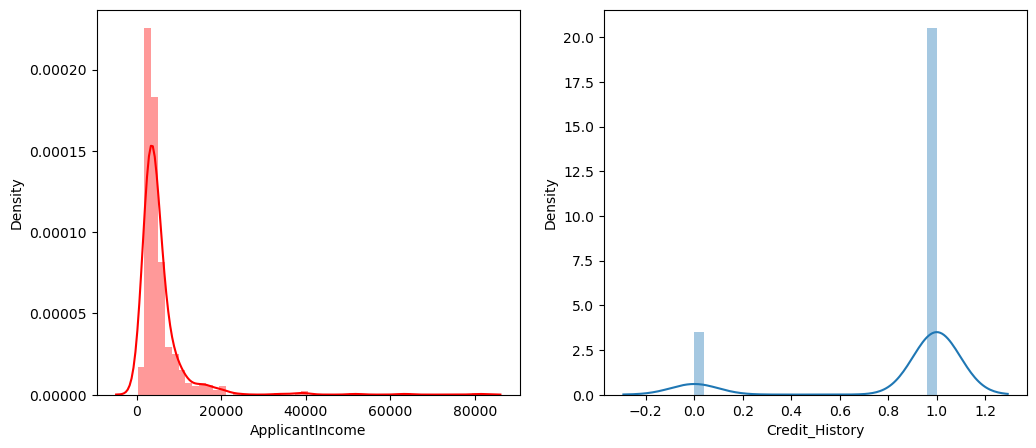

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'], color='r')
plt.subplot(122)
sns.distplot(data['Credit_History'])
plt.show()

C:\Users\John Weslin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\John Weslin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


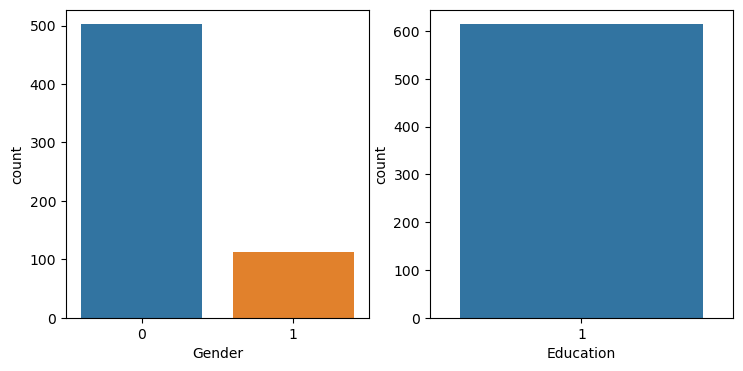

In [22]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(data['Gender'])

plt.subplot(1,4,2)
sns.countplot(data['Education'])
plt.show()

C:\Users\John Weslin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\John Weslin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\John Weslin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

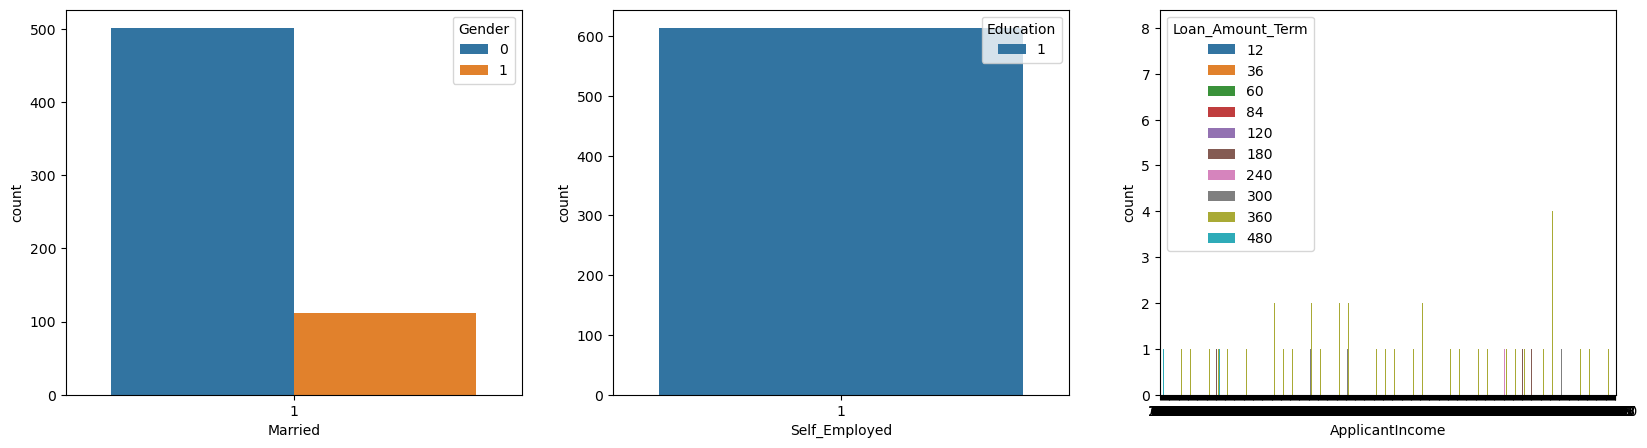

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(data['Married'], hue=data['Gender'])
plt.subplot(132)
sns.countplot(data['Self_Employed'], hue=data['Education'])
plt.subplot(133)
sns.countplot(data['ApplicantIncome'], hue=data['Loan_Amount_Term'])

C:\Users\John Weslin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\John Weslin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\John Weslin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

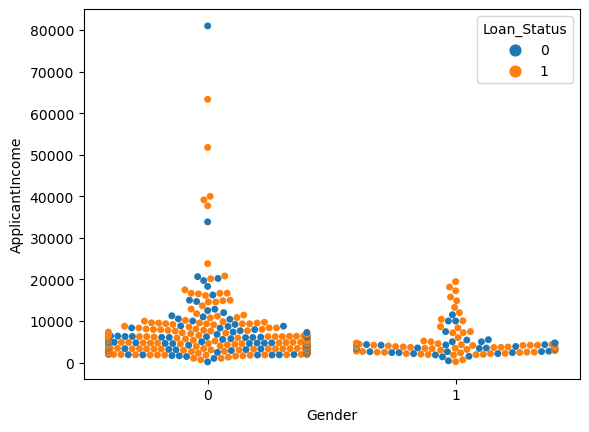

In [24]:
sns.swarmplot(data['Gender'],data['ApplicantIncome'], hue = data['Loan_Status'])

Balancing the Dataset

In [25]:
from imblearn.combine import SMOTETomek

In [26]:
smote = SMOTETomek()

In [27]:
y = data['Loan_Status']


In [28]:
x = data.drop(columns=['Loan_Status'],axis=1)

In [29]:
x.shape

(614, 11)

In [30]:
y.shape

(614,)

In [31]:
x_bal,y_bal = smote.fit_resample(x,y)

In [32]:
print(y.value_counts())
print(y_bal.value_counts())


1    422
0    192
Name: Loan_Status, dtype: int64
1    356
0    356
Name: Loan_Status, dtype: int64


In [33]:
names = x_bal.columns

In [34]:
x_bal.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,1,1,5849,0,120,360,1,2
1,0,1,1,1,1,4583,1508,128,360,1,0
2,0,1,0,1,1,3000,0,66,360,1,2
3,0,1,0,1,1,2583,2358,120,360,1,2
4,0,1,0,1,1,6000,0,141,360,1,2


SCalling the dataset

In [35]:
sc=StandardScaler()
x_bal=sc.fit_transform(x_bal)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size=0.33, random_state=42)

In [37]:
X_train.shape

(477, 11)

In [38]:
X_test.shape

(235, 11)

In [39]:
y_train.shape, y_test.shape

((477,), (235,))

In [40]:
def RandomForest(X_train,X_test, y_train, y_test):
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    y_tr = model.predict(X_train)
    print(accuracy_score(y_tr,y_train))
    yPred = model.predict(X_test)
    print(accuracy_score(yPred,y_test))


In [41]:
RandomForest(X_train,X_test,y_train,y_test)

1.0
0.825531914893617


In [42]:
def decisionTree(X_train,X_test, y_train, y_test):
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    y_tr = model.predict(X_train)
    print(accuracy_score(y_tr,y_train))
    yPred = model.predict(X_test)
    print(accuracy_score(yPred,y_test))

    

In [43]:
decisionTree(X_train,X_test, y_train, y_test)

1.0
0.7914893617021277


In [44]:
def KNN(X_train,X_test, y_train, y_test):
    model = KNeighborsClassifier()
    model.fit(X_train,y_train)
    y_tr = model.predict(X_train)
    print(accuracy_score(y_tr,y_train))
    yPred = model.predict(X_test)
    print(accuracy_score(yPred,y_test))


In [45]:
KNN(X_train,X_test, y_train, y_test)

0.8385744234800838
0.7702127659574468


C:\Users\John Weslin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\John Weslin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

In [46]:
def XGB(X_train,X_test, y_train, y_test):
    model = GradientBoostingClassifier()
    model.fit(X_train,y_train)
    y_tr = model.predict(X_train)
    print(accuracy_score(y_tr,y_train))
    yPred = model.predict(X_test)
    print(accuracy_score(yPred,y_test))


In [47]:
XGB(X_train,X_test, y_train, y_test)

0.9203354297693921
0.8085106382978723


In [48]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [49]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [50]:
classifier = Sequential()

In [51]:
classifier.add(Dense(units=100, activation='relu', input_dim=11))

In [52]:
classifier.add(Dense(units=50, activation='relu'))

In [53]:
classifier.add(Dense(units=1, activation='sigmoid'))

In [54]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
classifier.fit(X_train, y_train, batch_size=100, validation_split=0.2, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 82ms/step - loss: 0.7018 - accuracy: 0.5118 - val_loss: 0.6699 - val_accuracy: 0.5833
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6598 - accuracy: 0.6430 - val_loss: 0.6430 - val_accuracy: 0.7292
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6214 - accuracy: 0.7585 - val_loss: 0.6158 - val_accuracy: 0.7708
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.5898 - accuracy: 0.7717 - val_loss: 0.5913 - val_accuracy: 0.7708
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 0.5614 - accuracy: 0.7690 - val_loss: 0.5676 - val_accuracy: 0.7708
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.5362 - accuracy: 0.7717 - val_loss: 0.5493 - val_accuracy: 0.7604
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.5147 - accuracy: 0.7743 - val_loss: 0.5359 - val_accuracy: 0.7604
Epoch 8/100
4/4 [===

In [56]:
y_pred = classifier.predict(X_test)

8/8 [==============================] - 0s 1ms/step


In [57]:
y_pred

array([[9.2852533e-01],
       [9.5907599e-01],
       [9.5137173e-01],
       [7.5093406e-01],
       [7.5744623e-01],
       [9.1569331e-03],
       [8.7217927e-01],
       [5.6239843e-01],
       [6.8162280e-01],
       [9.6190411e-01],
       [9.3709922e-01],
       [9.7276872e-01],
       [6.4675039e-01],
       [1.4401569e-03],
       [3.0364953e-03],
       [2.5769052e-04],
       [3.8820960e-02],
       [6.5119487e-01],
       [9.0054542e-01],
       [8.4974259e-01],
       [5.9655055e-02],
       [5.9313822e-01],
       [7.9553545e-04],
       [7.2076127e-02],
       [9.6579099e-01],
       [3.2926288e-03],
       [8.8511139e-01],
       [1.7731576e-03],
       [8.4763831e-01],
       [6.8593401e-01],
       [1.7199653e-01],
       [1.4478601e-04],
       [9.5165378e-01],
       [2.0974265e-02],
       [9.8934710e-01],
       [9.2613363e-01],
       [7.3772186e-01],
       [6.2978321e-01],
       [9.4815660e-03],
       [6.3345772e-01],
       [8.4711681e-04],
       [9.586442

In [58]:
y_pred = y_pred.astype(int)

y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [59]:
print(accuracy_score(y_pred, y_test))
print("ANN Model")
print("Confusion_Matrix")
print(confusion_matrix(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test, y_pred))

0.5361702127659574
ANN Model
Confusion_Matrix
[[126   0]
 [109   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       126
           1       0.00      0.00      0.00       109

    accuracy                           0.54       235
   macro avg       0.27      0.50      0.35       235
weighted avg       0.29      0.54      0.37       235



C:\Users\John Weslin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John Weslin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John Weslin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hyper parameter tuning

In [60]:
rf = RandomForestClassifier()

In [61]:
parameters ={
    'n_estimators' : [1,20,30,55,68,74,90,120,115],
    'criterion' :['gini','entropy'],
    'max_features' : ["auto", "sqrt", "log2"],
    'max_depth' : [2,5,8,10], 'verbose' : [1,2,3,4,6,8,9,10]
}

In [62]:
RCV = RandomizedSearchCV(estimator=rf,param_distributions=parameters,cv=10,n_iter=4)

In [63]:
RCV.fit(X_train,y_train)

building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 77 of 90
building tree 78 of 90
building tree 79 of 90
building tree 80 of 90
building tree 81 of 90
building tree 82 of 90
building tree 83 of 90
building tree 84 of 90
building tree 85 of 90
building tree 86 of 90
building tree 87 of 90
building tree 88 of 90
building tree 89 of 90
building tree 90 of 90
building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished


building tree 82 of 90
building tree 83 of 90
building tree 84 of 90
building tree 85 of 90
building tree 86 of 90
building tree 87 of 90
building tree 88 of 90
building tree 89 of 90
building tree 90 of 90
building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished


building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 80 of 90
building tree 81 of 90
building tree 82 of 90
building tree 83 of 90
building tree 84 of 90
building tree 85 of 90
building tree 86 of 90
building tree 87 of 90
building tree 88 of 90
building tree 89 of 90
building tree 90 of 90
building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished


building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0

building tree 67 of 90
building tree 68 of 90
building tree 69 of 90
building tree 70 of 90
building tree 71 of 90
building tree 72 of 90
building tree 73 of 90
building tree 74 of 90
building tree 75 of 90
building tree 76 of 90
building tree 77 of 90
building tree 78 of 90
building tree 79 of 90
building tree 80 of 90
building tree 81 of 90
building tree 82 of 90
building tree 83 of 90
building tree 84 of 90
building tree 85 of 90
building tree 86 of 90
building tree 87 of 90
building tree 88 of 90
building tree 89 of 90
building tree 90 of 90
building tree 1 of 74
building tree 2 of 74
building tree 3 of 74
building tree 4 of 74
building tree 5 of 74
building tree 6 of 74
building tree 7 of 74
building tree 8 of 74
building tree 9 of 74
building tree 10 of 74
building tree 11 of 74
building tree 12 of 74
building tree 13 of 74
building tree 14 of 74
building tree 15 of 74
building tree 16 of 74
building tree 17 of 74
building tree 18 of 74
building tree 19 of 74
building tree 20 of 

[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.

building tree 2 of 74
building tree 3 of 74
building tree 4 of 74
building tree 5 of 74
building tree 6 of 74
building tree 7 of 74
building tree 8 of 74
building tree 9 of 74
building tree 10 of 74
building tree 11 of 74
building tree 12 of 74
building tree 13 of 74
building tree 14 of 74
building tree 15 of 74
building tree 16 of 74
building tree 17 of 74
building tree 18 of 74
building tree 19 of 74
building tree 20 of 74
building tree 21 of 74
building tree 22 of 74
building tree 23 of 74
building tree 24 of 74
building tree 25 of 74
building tree 26 of 74
building tree 27 of 74
building tree 28 of 74
building tree 29 of 74
building tree 30 of 74
building tree 31 of 74
building tree 32 of 74
building tree 33 of 74
building tree 34 of 74
building tree 35 of 74
building tree 36 of 74
building tree 37 of 74
building tree 38 of 74
building tree 39 of 74
building tree 40 of 74
building tree 41 of 74
building tree 42 of 74
building tree 43 of 74
building tree 44 of 74
building tree 45 of

[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.

building tree 11 of 74
building tree 12 of 74
building tree 13 of 74
building tree 14 of 74
building tree 15 of 74
building tree 16 of 74
building tree 17 of 74
building tree 18 of 74
building tree 19 of 74
building tree 20 of 74
building tree 21 of 74
building tree 22 of 74
building tree 23 of 74
building tree 24 of 74
building tree 25 of 74
building tree 26 of 74
building tree 27 of 74
building tree 28 of 74
building tree 29 of 74
building tree 30 of 74
building tree 31 of 74
building tree 32 of 74
building tree 33 of 74
building tree 34 of 74
building tree 35 of 74
building tree 36 of 74
building tree 37 of 74
building tree 38 of 74
building tree 39 of 74
building tree 40 of 74
building tree 41 of 74
building tree 42 of 74
building tree 43 of 74
building tree 44 of 74
building tree 45 of 74
building tree 46 of 74
building tree 47 of 74
building tree 48 of 74
building tree 49 of 74
building tree 50 of 74
building tree 51 of 74
building tree 52 of 74
building tree 53 of 74
building tr

[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.

building tree 63 of 74
building tree 64 of 74
building tree 65 of 74
building tree 66 of 74
building tree 67 of 74
building tree 68 of 74
building tree 69 of 74
building tree 70 of 74
building tree 71 of 74
building tree 72 of 74
building tree 73 of 74
building tree 74 of 74
building tree 1 of 74
building tree 2 of 74
building tree 3 of 74
building tree 4 of 74
building tree 5 of 74
building tree 6 of 74
building tree 7 of 74
building tree 8 of 74
building tree 9 of 74
building tree 10 of 74
building tree 11 of 74
building tree 12 of 74
building tree 13 of 74
building tree 14 of 74
building tree 15 of 74
building tree 16 of 74
building tree 17 of 74
building tree 18 of 74
building tree 19 of 74
building tree 20 of 74
building tree 21 of 74
building tree 22 of 74
building tree 23 of 74
building tree 24 of 74
building tree 25 of 74
building tree 26 of 74
building tree 27 of 74
building tree 28 of 74
building tree 29 of 74
building tree 30 of 74
building tree 31 of 74
building tree 32 of 

[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.

building tree 15 of 74
building tree 16 of 74
building tree 17 of 74
building tree 18 of 74
building tree 19 of 74
building tree 20 of 74
building tree 21 of 74
building tree 22 of 74
building tree 23 of 74
building tree 24 of 74
building tree 25 of 74
building tree 26 of 74
building tree 27 of 74
building tree 28 of 74
building tree 29 of 74
building tree 30 of 74
building tree 31 of 74
building tree 32 of 74
building tree 33 of 74
building tree 34 of 74
building tree 35 of 74
building tree 36 of 74
building tree 37 of 74
building tree 38 of 74
building tree 39 of 74
building tree 40 of 74
building tree 41 of 74
building tree 42 of 74
building tree 43 of 74
building tree 44 of 74
building tree 45 of 74
building tree 46 of 74
building tree 47 of 74
building tree 48 of 74
building tree 49 of 74
building tree 50 of 74
building tree 51 of 74
building tree 52 of 74
building tree 53 of 74
building tree 54 of 74
building tree 55 of 74
building tree 56 of 74
building tree 57 of 74
building tr

[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.

building tree 8 of 55
building tree 9 of 55
building tree 10 of 55
building tree 11 of 55
building tree 12 of 55
building tree 13 of 55
building tree 14 of 55
building tree 15 of 55
building tree 16 of 55
building tree 17 of 55
building tree 18 of 55
building tree 19 of 55
building tree 20 of 55
building tree 21 of 55
building tree 22 of 55
building tree 23 of 55
building tree 24 of 55
building tree 25 of 55
building tree 26 of 55
building tree 27 of 55
building tree 28 of 55
building tree 29 of 55
building tree 30 of 55
building tree 31 of 55
building tree 32 of 55
building tree 33 of 55
building tree 34 of 55
building tree 35 of 55
building tree 36 of 55
building tree 37 of 55
building tree 38 of 55
building tree 39 of 55
building tree 40 of 55
building tree 41 of 55
building tree 42 of 55
building tree 43 of 55
building tree 44 of 55
building tree 45 of 55
building tree 46 of 55
building tree 47 of 55
building tree 48 of 55
building tree 49 of 55
building tree 50 of 55
building tree

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elap

building tree 1 of 55
building tree 2 of 55
building tree 3 of 55
building tree 4 of 55
building tree 5 of 55
building tree 6 of 55
building tree 7 of 55
building tree 8 of 55
building tree 9 of 55
building tree 10 of 55
building tree 11 of 55
building tree 12 of 55
building tree 13 of 55
building tree 14 of 55
building tree 15 of 55
building tree 16 of 55
building tree 17 of 55
building tree 18 of 55
building tree 19 of 55
building tree 20 of 55
building tree 21 of 55
building tree 22 of 55
building tree 23 of 55
building tree 24 of 55
building tree 25 of 55
building tree 26 of 55
building tree 27 of 55
building tree 28 of 55
building tree 29 of 55
building tree 30 of 55
building tree 31 of 55
building tree 32 of 55
building tree 33 of 55
building tree 34 of 55
building tree 35 of 55
building tree 36 of 55
building tree 37 of 55
building tree 38 of 55
building tree 39 of 55
building tree 40 of 55
building tree 41 of 55
building tree 42 of 55
building tree 43 of 55
building tree 44 of 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elap

building tree 3 of 55
building tree 4 of 55
building tree 5 of 55
building tree 6 of 55
building tree 7 of 55
building tree 8 of 55
building tree 9 of 55
building tree 10 of 55
building tree 11 of 55
building tree 12 of 55
building tree 13 of 55
building tree 14 of 55
building tree 15 of 55
building tree 16 of 55
building tree 17 of 55
building tree 18 of 55
building tree 19 of 55
building tree 20 of 55
building tree 21 of 55
building tree 22 of 55
building tree 23 of 55
building tree 24 of 55
building tree 25 of 55
building tree 26 of 55
building tree 27 of 55
building tree 28 of 55
building tree 29 of 55
building tree 30 of 55
building tree 31 of 55
building tree 32 of 55
building tree 33 of 55
building tree 34 of 55
building tree 35 of 55
building tree 36 of 55
building tree 37 of 55
building tree 38 of 55
building tree 39 of 55
building tree 40 of 55
building tree 41 of 55
building tree 42 of 55
building tree 43 of 55
building tree 44 of 55
building tree 45 of 55
building tree 46 o

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elaps

building tree 23 of 55
building tree 24 of 55
building tree 25 of 55
building tree 26 of 55
building tree 27 of 55
building tree 28 of 55
building tree 29 of 55
building tree 30 of 55
building tree 31 of 55
building tree 32 of 55
building tree 33 of 55
building tree 34 of 55
building tree 35 of 55
building tree 36 of 55
building tree 37 of 55
building tree 38 of 55
building tree 39 of 55
building tree 40 of 55
building tree 41 of 55
building tree 42 of 55
building tree 43 of 55
building tree 44 of 55
building tree 45 of 55
building tree 46 of 55
building tree 47 of 55
building tree 48 of 55
building tree 49 of 55
building tree 50 of 55
building tree 51 of 55
building tree 52 of 55
building tree 53 of 55
building tree 54 of 55
building tree 55 of 55
building tree 1 of 1
building tree 1 of 1
building tree 1 of 1
building tree 1 of 1
building tree 1 of 1
building tree 1 of 1
building tree 1 of 1
building tree 1 of 1
building tree 1 of 1
building tree 1 of 1
building tree 1 of 90
building 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=4,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 5, 8, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [1, 20, 30, 55, 68, 74,
                                                         90, 120, 115],
                                        'verbose': [1, 2, 3, 4, 6, 8, 9, 10]})

In [64]:
bt_params = RCV.best_params_
bt_score = RCV.best_score_

In [65]:
bt_params

{'verbose': 2,
 'n_estimators': 90,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'entropy'}

In [66]:
bt_score

0.794104609929078

In [67]:
def RandomForest(X_train,X_test, y_train, y_test):
    model = RandomForestClassifier(verbose= 10 , n_estimators= 68 , max_features= 'auto', max_depth= 8 , criterion= 'entropy')
    model.fit(X_train,y_train)
    y_tr = model.predict(X_train)
    print("Training Accuracy")
    print(accuracy_score(y_tr,y_train))
    yPred = model.predict(X_test)
    print("Training Accuracy")
    print(accuracy_score(yPred,y_test))


In [68]:
model = RandomForestClassifier(verbose= 10 , n_estimators= 68 , max_features= 'auto', max_depth= 8 , criterion= 'entropy')
model.fit(X_train,y_train)

building tree 1 of 68
building tree 2 of 68
building tree 3 of 68
building tree 4 of 68
building tree 5 of 68
building tree 6 of 68
building tree 7 of 68
building tree 8 of 68
building tree 9 of 68
building tree 10 of 68
building tree 11 of 68
building tree 12 of 68
building tree 13 of 68
building tree 14 of 68
building tree 15 of 68
building tree 16 of 68
building tree 17 of 68
building tree 18 of 68
building tree 19 of 68
building tree 20 of 68
building tree 21 of 68
building tree 22 of 68
building tree 23 of 68
building tree 24 of 68
building tree 25 of 68
building tree 26 of 68
building tree 27 of 68
building tree 28 of 68
building tree 29 of 68
building tree 30 of 68
building tree 31 of 68
building tree 32 of 68
building tree 33 of 68
building tree 34 of 68
building tree 35 of 68
building tree 36 of 68
building tree 37 of 68
building tree 38 of 68
building tree 39 of 68
building tree 40 of 68
building tree 41 of 68
building tree 42 of 68
building tree 43 of 68
building tree 44 of 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    0.0s finished


RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=68,
                       verbose=10)

In [69]:
RandomForest(X_train,X_test,y_train,y_test)

building tree 1 of 68
building tree 2 of 68
building tree 3 of 68
building tree 4 of 68
building tree 5 of 68
building tree 6 of 68
building tree 7 of 68
building tree 8 of 68
building tree 9 of 68
building tree 10 of 68
building tree 11 of 68
building tree 12 of 68
building tree 13 of 68
building tree 14 of 68
building tree 15 of 68
building tree 16 of 68
building tree 17 of 68
building tree 18 of 68
building tree 19 of 68
building tree 20 of 68
building tree 21 of 68
building tree 22 of 68
building tree 23 of 68
building tree 24 of 68
building tree 25 of 68
building tree 26 of 68
building tree 27 of 68
building tree 28 of 68
building tree 29 of 68
building tree 30 of 68
building tree 31 of 68
building tree 32 of 68
building tree 33 of 68
building tree 34 of 68
building tree 35 of 68
building tree 36 of 68
building tree 37 of 68
building tree 38 of 68
building tree 39 of 68
building tree 40 of 68
building tree 41 of 68
building tree 42 of 68
building tree 43 of 68
building tree 44 of 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elap

saving the model

In [70]:
pickle.dump(model,open('rdf.pk1','wb'))

In [71]:
pickle.dump(sc,open('scale.pk1','wb'))